<a href="https://colab.research.google.com/github/anu3200/Internship/blob/main/HR_Salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.figure_factory as ff
import plotly.express as px

#To ignore warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("salarydata.csv") # reading the dataset
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**Overview**

In [3]:
data.shape

(32561, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  salary          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


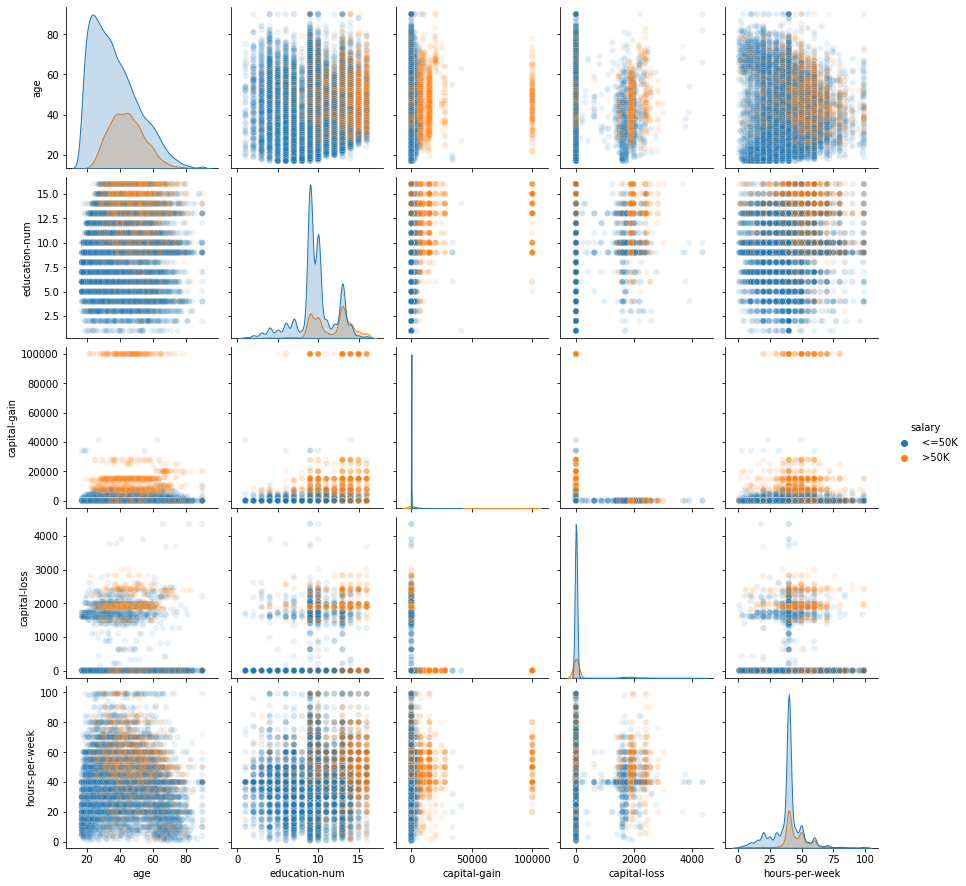

In [5]:
sns.pairplot(data,hue ='salary',plot_kws={'alpha':0.1})

As we can see the dataset is unbalanced 3:1




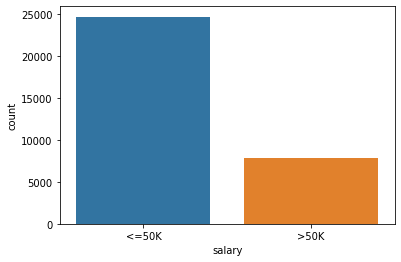

In [6]:
sns.countplot(x="salary", data=data)
plt.savefig('unbalanced.png')

In [7]:
data.salary.value_counts()/data.shape[0]

<=50K    0.75919
>50K     0.24081
Name: salary, dtype: float64

In [8]:
data.salary.value_counts()

<=50K    24720
>50K      7841
Name: salary, dtype: int64

**Going through each variable**

**Age**

<Axes: xlabel='age', ylabel='Density'>

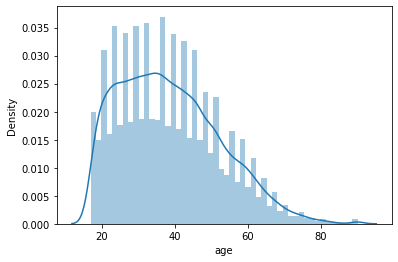

In [9]:
sns.distplot(data['age'])



* The age distribution of our dataset is skewed



**Education**

In [10]:
data['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [11]:
data.groupby(['education', 'salary'])['salary'].count()

education     salary
10th          <=50K      871
              >50K        62
11th          <=50K     1115
              >50K        60
12th          <=50K      400
              >50K        33
1st-4th       <=50K      162
              >50K         6
5th-6th       <=50K      317
              >50K        16
7th-8th       <=50K      606
              >50K        40
9th           <=50K      487
              >50K        27
Assoc-acdm    <=50K      802
              >50K       265
Assoc-voc     <=50K     1021
              >50K       361
Bachelors     <=50K     3134
              >50K      2221
Doctorate     <=50K      107
              >50K       306
HS-grad       <=50K     8826
              >50K      1675
Masters       <=50K      764
              >50K       959
Preschool     <=50K       51
Prof-school   <=50K      153
              >50K       423
Some-college  <=50K     5904
              >50K      1387
Name: salary, dtype: int64

Education number

Education and education_num is basically the same



In [12]:
data[['education','education-num']].drop_duplicates().sort_values('education-num',ascending = False)

,education,education-num
20,Doctorate,16
52,Prof-school,15
5,Masters,14
0,Bachelors,13
13,Assoc-acdm,12
14,Assoc-voc,11
10,Some-college,10
2,HS-grad,9
415,12th,8
3,11th,7


<Axes: xlabel='education-num', ylabel='Density'>

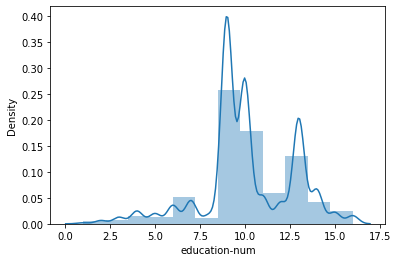

In [13]:
sns.distplot(data['education-num'],bins=12)

As we can see there are spikes in the same places in the graph such as finishing high school, associates etc.

**Capital Gains**

<Axes: xlabel='capital-gain', ylabel='Density'>

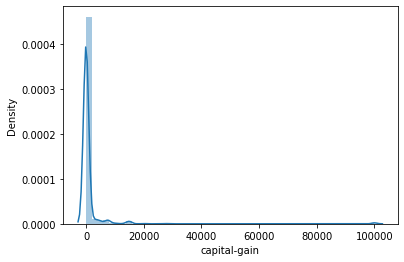

In [14]:
sns.distplot((data['capital-gain']))

As we can see here is that a lot of people dont gain anything from investing or doent invest at all. So, we will analyze the data without the people who didnt make anything external income.

**Capital Loss**

<Axes: xlabel='capital-loss', ylabel='Density'>

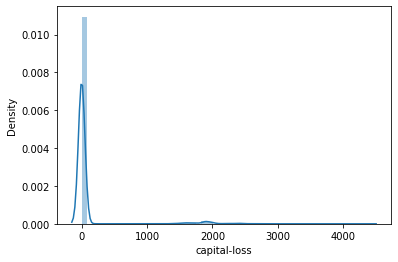

In [15]:
sns.distplot((data['capital-loss']))

**Hours per Week**

<Axes: xlabel='hours-per-week', ylabel='Density'>

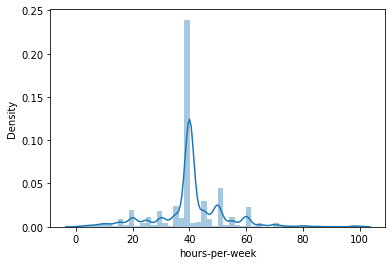

In [16]:
sns.distplot((data['hours-per-week']))

**Data cleaning**

In [17]:
data.isin(['?']).sum() # dataset contains meaningless values of '?' in certain columns

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [18]:
data = data.replace(to_replace='?', value=np.nan) # replacing fields having '?' with null values

In [19]:
# Making sure that the data does not contain unecessary spaces.
data=data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [20]:
# converting the target column into numerical classes (values of either 0 or 1).
data['salary'] = data['salary'].replace({'<=50K':0,'>50K':1})

In [21]:
uniq= pd.DataFrame(data.nunique(),columns=['Unique Values'])
uniq

,Unique Values
age,73
workclass,8
education,16
education-num,16
marital-status,7
occupation,14
relationship,6
race,5
sex,2
capital-gain,119


In [22]:
data.isna().sum()

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [23]:
Total = data.isnull().sum().sort_values(ascending=False) 
Percent = (data.isnull().sum()*100/data.isnull().count()).sort_values(ascending=False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])
missing_data

,Total,Percentage of Missing Values
occupation,1843,5.660146
workclass,1836,5.638647
native-country,583,1.790486
age,0,0.000000
education,0,0.000000
education-num,0,0.000000
marital-status,0,0.000000
relationship,0,0.000000
race,0,0.000000
sex,0,0.000000


In [24]:
# numeric features
numeric_features = data.select_dtypes(include=np.number)
numeric_features.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'salary'],
      dtype='object')

In [25]:
# categoric features
categoric_features = data.select_dtypes(include='object')
categoric_features.columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

In [26]:
# filling missing values
msv_col = ['workclass','occupation','native-country']
for col in msv_col:
    data[col] = data[col].fillna(data[col].mode()[0])

In [27]:
data.isna().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [28]:
# education & education number column are just the same, so dropping education number column.
data.drop(labels='education-num', axis=1, inplace=True)

In [29]:
# Transforming Maritial Status column with value as either married or not married.
data = data.replace({'Married-civ-spouse':'married','Married-AF-spouse':'married','Married-spouse-absent':'married',
                    'Never-married':'not married','Divorced':'not married','Separated':'not married','Widowed':'not married'})

**Data Exploration**

In [30]:
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [31]:
# a quick look on some statistics about the data
data.describe()

,age,capital-gain,capital-loss,hours-per-week,salary
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1077.648844,87.303830,40.437456,0.240810
std,13.640433,7385.292085,402.960219,12.347429,0.427581
min,17.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,99999.000000,4356.000000,99.000000,1.000000


<Axes: >

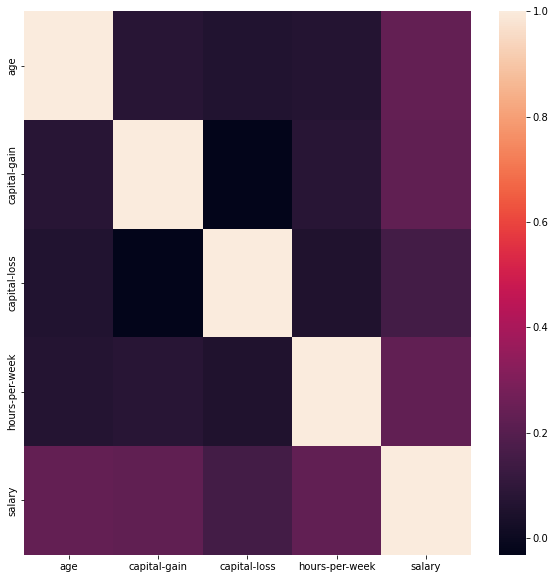

In [34]:
import seaborn as sns
corr = data.corr()
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,)

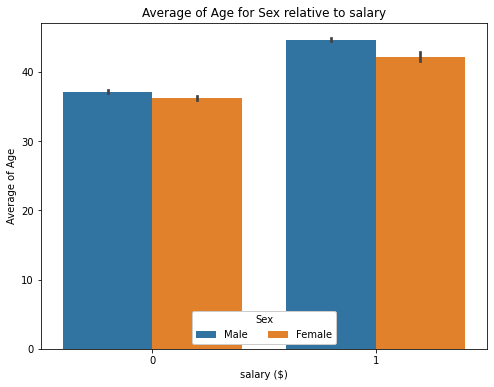

In [33]:
# Clustered Bar Chart 
plt.figure(figsize=[8,6])
ax = sb.barplot(data =data, x = 'salary', y = 'age', hue = 'sex')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Sex')
plt.title('Average of Age for Sex relative to salary')
plt.xlabel('salary ($)')
plt.ylabel('Average of Age');

The figure shows in general that the people with >50K has a higher average age than the ones with <=50K. And in both cases of income, we see that the male category has a little bit greater age average than the female category.




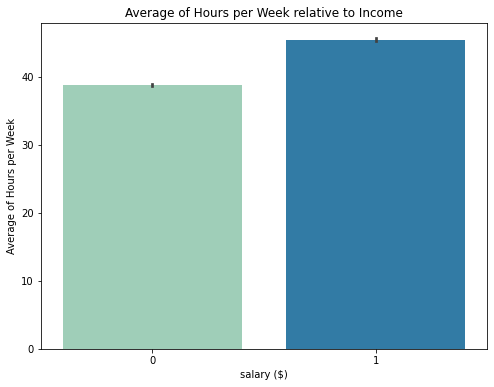

In [35]:
# Bar Chart 
plt.figure(figsize=[8,6])
sb.barplot(data=data, x='salary', y='hours-per-week', palette='YlGnBu')
plt.title('Average of Hours per Week relative to Income')
plt.xlabel('salary ($)')
plt.ylabel('Average of Hours per Week');

We notice here that the income grows directly with the average of work hours per week, which is a pretty reasonable and logical result.

**Data Preprocessing**

In [36]:
from sklearn.preprocessing import LabelEncoder
column = ['workclass', 'education', 'marital-status', 'occupation','relationship', 'race', 'sex', 'native-country']
le = LabelEncoder()

In [37]:
for col in column:
    data[col] = le.fit_transform(data[col])
data.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,6,9,1,0,1,4,1,2174,0,40,38,0
1,50,5,9,0,3,0,4,1,0,0,13,38,0
2,38,3,11,1,5,1,4,1,0,0,40,38,0
3,53,3,1,0,5,0,2,1,0,0,40,38,0
4,28,3,9,0,9,5,2,0,0,0,40,4,0


In [38]:
data.drop(['capital-gain','capital-loss'],axis=1,inplace=True)
data.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,6,9,1,0,1,4,1,40,38,0
1,50,5,9,0,3,0,4,1,13,38,0
2,38,3,11,1,5,1,4,1,40,38,0
3,53,3,1,0,5,0,2,1,40,38,0
4,28,3,9,0,9,5,2,0,40,4,0


In [39]:
X=data.drop('salary',axis=1)
y=data['salary']

In [40]:
# Feature scaling on training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X[['age',  'hours-per-week']])
input_scaled = scaler.transform(X[['age',  'hours-per-week']])
scaled_data = pd.DataFrame(input_scaled,columns=['age',  'hours-per-week'])

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [42]:
from sklearn.linear_model import LogisticRegression
#Defining Logistic Regression Model & fitting train data
lr=LogisticRegression()
logit_model=lr.fit(X_train,y_train)
#Predicting the result of test data using obtained model
y_pred_logit=logit_model.predict(X_test)

In [43]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
precision_score(y_test,y_pred_logit)

0.5749464668094219

In [44]:
accuracy_score(y_test,y_pred_logit)

0.7802855826807923

In [45]:
X=data.drop('salary',axis=1)
y=data['salary']

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [47]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(X_train,y_train)
y_pred_dt = dt_clf.predict(X_test)

In [48]:
accuracy_score(y_test,y_pred_dt)

0.7750652541071703

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
model_rf=rf.fit(X_train,y_train)
y_pred_rf=model_rf.predict(X_test)

In [50]:
# fit model no training data
from numpy import loadtxt
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [51]:
print(model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


In [52]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [53]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 83.99%


In [54]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
Y_pred=svc.predict(X_test)
print('Accuracy on training data is:',svc.score(X_train,y_train))
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))

Accuracy on training data is: 0.7678900491400491
Accuracy is: 0.8398587440503608
Precision is: 0.8332476648047339
Recall is: 0.8398587440503608
f1 score is: 0.8350683788168878


In [55]:
from tabulate import tabulate
table = [['Model', 'Accuracy'], ['Logistic Regression',77.95],['Decision tree',77.64],['Random Forest',82.02],['XGB Classifier',83.99],['SVM',83.98]]
print(tabulate(table,headers='firstrow',tablefmt='fancy_grid'))

╒═════════════════════╤════════════╕
│ Model               │   Accuracy │
╞═════════════════════╪════════════╡
│ Logistic Regression │      77.95 │
├─────────────────────┼────────────┤
│ Decision tree       │      77.64 │
├─────────────────────┼────────────┤
│ Random Forest       │      82.02 │
├─────────────────────┼────────────┤
│ XGB Classifier      │      83.99 │
├─────────────────────┼────────────┤
│ SVM                 │      83.98 │
╘═════════════════════╧════════════╛


In [56]:
from sklearn.model_selection import GridSearchCV
# Creating the hyperparameter grid
param_grid = {'C': [1,10,100,1000]}
# Instantiating logistic regression classifier
logreg = LogisticRegression()
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(X_train, y_train)
logreg_cv.predict(X_test)
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 10}
Best score is 0.7772955710421465


In [57]:
pd.Series(model_rf.feature_importances_,index=X.columns).sort_values(ascending=False)*100

age               28.301897
hours-per-week    14.005941
education         13.586892
occupation        11.558766
marital-status    10.336072
relationship       9.753553
workclass          6.148910
native-country     2.445895
race               2.352100
sex                1.509973
dtype: float64

In [58]:
param_grid = { 
    'n_estimators': [100,200,300],
    'max_depth' : [20,25,30],
    'criterion' :['gini', 'entropy']
}

In [59]:
from sklearn.model_selection import GridSearchCV
CV_rfc = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

{'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 300}

In [60]:
rft = RandomForestClassifier(n_estimators=300,max_depth=25,random_state=42,criterion='entropy')
rft.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=25, n_estimators=300,
                       random_state=42)

In [61]:
y_pred=rft.predict(X_test)
accuracy_score(y_test,y_pred)

0.8245048364808844

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89      4942
           1       0.66      0.57      0.61      1571

    accuracy                           0.82      6513
   macro avg       0.76      0.74      0.75      6513
weighted avg       0.82      0.82      0.82      6513



In [63]:
from tabulate import tabulate
table = [['Model', 'Accuracy'], ['Logistic Regression',77.7],['Random Forest',82.45]]
print(tabulate(table,headers='firstrow',tablefmt='fancy_grid'))

╒═════════════════════╤════════════╕
│ Model               │   Accuracy │
╞═════════════════════╪════════════╡
│ Logistic Regression │      77.7  │
├─────────────────────┼────────────┤
│ Random Forest       │      82.45 │
╘═════════════════════╧════════════╛


In [64]:
X

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country
0,39,6,9,1,0,1,4,1,40,38
1,50,5,9,0,3,0,4,1,13,38
2,38,3,11,1,5,1,4,1,40,38
3,53,3,1,0,5,0,2,1,40,38
4,28,3,9,0,9,5,2,0,40,4
...,...,...,...,...,...,...,...,...,...,...
32556,27,3,7,0,12,5,4,0,38,38
32557,40,3,11,0,6,0,4,1,40,38
32558,58,3,11,1,0,4,4,0,40,38
32559,22,3,11,1,0,3,4,1,20,38


In [65]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: salary, Length: 32561, dtype: int64

In [66]:
X=data.iloc[:,[0,1,2,3,4,5,6,7,8,9]].values
X=np.array(X)

In [67]:
y=data['salary'].values
y=np.array(y)

In [68]:
import pickle
filename = 'salary_pred_model.pkl'
pickle.dump(rft,open(filename,'wb'))
loaded_model = pickle.load(open(filename,'rb'))